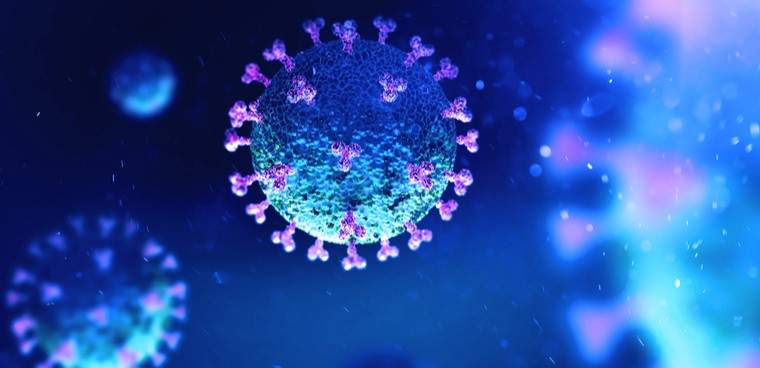

# **COVID-19 Visualisation and Analysis** 
## *(from 22 Jan 2020)*

<br/>

# Table of Contents:


## COVID-19 Worldwide 

1. [Aggregate Numbers](#wolrdnumber)
1. [Top List for 1-week Increase](#1week)
1. [Countries with highest Confirmed Cases](#ConfirmedcasesbyCountry)
1. [Death Rate and Recover Rate](#deathrate)
1. [New cases vs. Confirmed cases](#newvsconfirm)
1. [Trend of 'New cases' by countries](#roll7trend)
1. [COVID-19 on World Map View](#mapview)
1. [Animation on Evolution of COVID-19](#animatemapview)

<br/>

## COVID-19 in the U.S. 
1. [Distribution by States](#distUS)
1. [Death Rate by States](#deathrateUS)
1. [Map View of COVID-19](#mapviewUS)
1. [Animation of COVID-19 spread](#animatemapviewUS)
1. [Analysis of trend on 'New cases' brokedown by States](#trendUS)


In [ ]:
import numpy as np
import pandas as pd

# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot

import plotly.express as px
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# matplotlib
import matplotlib.pyplot as plt

# stats
import statsmodels.api as sm


In [ ]:
d2d_full = pd.read_csv('../input/corona-virus-report/full_grouped.csv') # d2d country wise no. of cases (Has County/State/Province)
d2d = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv') # d2d country wise no. of cases (Doesn't have County/State/Province)
country_wise = pd.read_csv('../input/corona-virus-report/country_wise_latest.csv') # Latest country level no. of cases
day_wise = pd.read_csv('../input/corona-virus-report/day_wise.csv') # Day wise no. of cases (Doesn't have country level data)
usa_county = pd.read_csv('../input/corona-virus-report/usa_county_wise.csv') # Day to day county level no. of cases

##

cw = country_wise
dw = day_wise
usa = usa_county

#look
start_date = d2d_full.loc[0,'Date']
end_date = d2d_full.loc[len(d2d_full)-1,'Date']

print('The dataset is from', start_date, 'to', end_date, '.')

# COVID-19 Worldwide

<div id="wolrdnumber"></div>

## COVID-19 Numbers for World


* The graph shows aggregated numbers on confirmed cases, deaths etc. for the whole world
* The Confirmed Cases are still raising with no signs of flattening
* The New Cases are also raising with no signs of reducing


In [ ]:
# COVID-19 Numbers for World
color_map = {'Confirmed':'red', 'Deaths':'black', 'Recovered':'green', 'New cases':'purple', 'Active':'yellow'}
fig = px.line(dw, x="Date", y=["Confirmed",'Deaths','Recovered','New cases','Active'], title='COVID-19 Numbers for World',
              labels={'value':'Number of People'},
              color_discrete_map=color_map)

fig.update_layout(template='ggplot2')
fig.show()

<div id='1week'></div>

## 1 week increase in Confirmed cases


In [ ]:
# top 20 one week number increase
top20 = cw.sort_values(by='1 week change',ascending=True).tail(20).reset_index()

color_map = {'Americas':'dodgerblue', 'Europe':'mediumseagreen', 'Western Pacific':'blueviolet', 
             'Eastern Mediterranean':'darkred', 'Africa':'gold', 'South-East Asia':'deeppink'}

fig = px.bar(top20, x=['1 week change'], y='Country/Region', title='1 week increase',
             color='WHO Region',
             labels={'value': 'Increase in cases over past week'},
             barmode='relative', 
             text='value',
             color_discrete_map=color_map,
             template='ggplot2',
             height=600
             )
fig.update_traces(textposition='inside')
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(template='ggplot2')
fig.show()

## 1 week percentage increase in Confirmed cases

 

In [ ]:
# top 20 one week % increase
top20 = cw.sort_values(by='1 week % increase',ascending=True).tail(20).reset_index()
top20['1 week % increase'] = top20['1 week % increase']/100

color_map = {'Americas':'dodgerblue', 'Europe':'mediumseagreen', 'Western Pacific':'blueviolet', 
             'Eastern Mediterranean':'darkred', 'Africa':'gold', 'South-East Asia':'deeppink'}

fig = px.bar(top20, x=['1 week % increase'], y='Country/Region', title='1 week % increase',
             color='WHO Region',
             labels={'value': 'Increase in % cases over past week'},
             barmode='relative', 
             text='value',
             color_discrete_map=color_map,
             template='ggplot2',
             height=600
             )
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(template='ggplot2')
fig.show()

<div id="#ConfirmedcasesbyCountry"></div>

## Distribution of Confirmed cases by Country
    
  

In [ ]:
# top 20 countries for 'Confirmed'
top20 = cw.sort_values(by='Confirmed',ascending=True).tail(20).reset_index()

# pie chart

fig = px.pie(cw, values='Confirmed', names='Country/Region', title='Percentage of Confirmed')
fig.update_traces(textposition='inside', textinfo='label+percent')

fig.show()

# bar chart
color_map = {'Confirmed':'dodgerblue', 'Deaths':'red', 'Recovered':'limegreen'}
fig = px.bar(top20, x=['Confirmed','Recovered','Deaths'], y='Country/Region', title='Confirmed, Recovered and Deaths',
             labels={'value': 'Number of People'},
             barmode='overlay', 
             opacity=1,
            color_discrete_map=color_map)

fig.update_layout(template='ggplot2')
fig.show()

<div id="#deathrate"></div>

## Death Rate by Country
    

In [ ]:
# highest death/recover rate

# make copy and make rates
cw1 = cw.copy()
cw1['Death_rate'] = cw1.Deaths/cw1.Confirmed
cw1['Recover_rate'] = cw1.Recovered/cw1.Confirmed

# top 20 death rate
top20_DR = cw1.sort_values(by='Death_rate',ascending=True).tail(20)


fig = px.bar(top20_DR, x=['Death_rate'], y='Country/Region', title='Death Rate by Country',
             labels={'value': 'Death Rate'},
             barmode='group', 
             text='value',
             color_discrete_map={'Death_rate':'brown'},
             template='ggplot2',
             height=600
             )
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(template='ggplot2')
fig.show()



## Recover Rate by Country

* Only including countries with >500 confirmed cases

In [ ]:
# top 20 recover rate, at least have 500 confirmed
top20_RR = cw1[cw1['Confirmed'] > 500].sort_values(by='Recover_rate',ascending=True).tail(20)

fig = px.bar(top20_RR, x=['Recover_rate'], y='Country/Region', title='Recover Rate by Country',
             labels={'value': 'Recover Rate'},
             barmode='group', 
             text='value',
             color_discrete_map={'Recover_rate':'limegreen'},
             template='ggplot2',
             height=600
             )
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(template='ggplot2')
fig.show()

<div id="#newvsconfirm"></div>

## New cases vs. Confirmed cases

* It is interesting to plot New cases vs. Confirmed cases
* Being above the line meaning higher new cases relative to confirmed cases, this could mean a more rapid widespread of the virus
* India and Brazil are well above the line, while U.S. and Russia are somewhat below

In [ ]:
# top 20 confirmed vs new cases
top20_conf = country_wise.sort_values(by='Confirmed',ascending=False).head(20)

fig = px.scatter(top20_conf, x='Confirmed', y='New cases', color='Country/Region', title='New cases vs. Confirmed',
                size='Confirmed',
                )

ols = sm.OLS(top20_conf['New cases'],sm.add_constant(top20_conf['Confirmed'])).fit().fittedvalues
fig.add_trace(go.Scatter(x=top20_conf['Confirmed'], y=ols,
                          mode = 'lines',
                          marker_color='gold',
                          name='trend')
                          )

fig.update_layout(template='ggplot2')
fig.show()

<div id="roll7trend"></div>

## Trend of New cases in Americas

* Most countries are still experience an increase in daily new cases, except Canada
* Brazil and U.S. are the highest two
* Unfortunately the U.S. was already seeing a drop in the new cases until June, then it started to raise again

In [ ]:
# AMERICAS
# new case by date, ROLLING 7 days

# country list, top 8
top8 = cw.loc[cw['WHO Region'] == 'Americas'].sort_values(by='Confirmed', ascending=False).head(8)
c_name = list(top8['Country/Region'])

# make a copy
t2t = d2d_full.copy()

# select country from country list
aa = t2t.loc[t2t['Country/Region'].isin(c_name)]

# calculate rolling 7 days mean
bb = aa.groupby('Country/Region').rolling(7).mean().reset_index()

# remake date index
start_date = t2t.loc[0,'Date'] # start day on data
end_date = t2t.loc[len(t2t)-1,'Date'] # last day on data

date_range = pd.DataFrame(pd.date_range(start=start_date, end=end_date)) # date range

date_range = pd.concat([date_range] * len(c_name), ignore_index=True).rename(columns={0:'Date'}) # date range * NO. of country

# plot
fig = px.line(bb, x=date_range['Date'], y='New cases', title='Number of New cases (rolling 7 days): Americas',
             color='Country/Region')

fig.update_layout(template='plotly_white')
fig.update_layout(xaxis=dict(title='Date'))
fig.show()


## Trend of New cases in Europe

* Russia could be slowing down in the widespread
* Most countries in the Europe seems are flattening the curve

In [ ]:
# Europe
# new case by date, ROLLING 7 days

# country list
# country list, top 8
top8 = cw.loc[cw['WHO Region'] == 'Europe'].sort_values(by='Confirmed', ascending=False).head(8)
c_name = list(top8['Country/Region'])

# make a copy
t2t = d2d_full.copy()

# select country from country list
aa = t2t.loc[t2t['Country/Region'].isin(c_name)]

# calculate rolling 7 days mean
bb = aa.groupby('Country/Region').rolling(7).mean().reset_index()

# remake date index
start_date = t2t.loc[0,'Date'] # start day on data
end_date = t2t.loc[len(t2t)-1,'Date'] # last day on data

date_range = pd.DataFrame(pd.date_range(start=start_date, end=end_date)) # date range

date_range = pd.concat([date_range] * len(c_name), ignore_index=True).rename(columns={0:'Date'}) # date range * NO. of country

# plot
fig = px.line(bb, x=date_range['Date'], y='New cases', title='Number of New cases (rolling 7 days): Europe',
             color='Country/Region')

fig.update_layout(template='plotly_white')
fig.update_layout(xaxis=dict(title='Date'))
fig.show()


## Trend of New cases in Asia

* India is experiencing rapid daily increases, followed by Bangladesh 
* Indonesia and Philippines are having slight increases

In [ ]:
# Asia
# new case by date, ROLLING 7 days

# country list
# country list, top 8
top8 = cw.loc[(cw['WHO Region'] == 'Western Pacific') | (cw['WHO Region'] == 'South-East Asia')].sort_values(by='Confirmed', ascending=False).head(8)
c_name = list(top8['Country/Region'])

# make a copy
t2t = d2d_full.copy()

# select country from country list
aa = t2t.loc[t2t['Country/Region'].isin(c_name)]

# calculate rolling 7 days mean
bb = aa.groupby('Country/Region').rolling(7).mean().reset_index()

# remake date index
start_date = t2t.loc[0,'Date'] # start day on data
end_date = t2t.loc[len(t2t)-1,'Date'] # last day on data

date_range = pd.DataFrame(pd.date_range(start=start_date, end=end_date)) # date range

date_range = pd.concat([date_range] * len(c_name), ignore_index=True).rename(columns={0:'Date'}) # date range * NO. of country

# plot
fig = px.line(bb, x=date_range['Date'], y='New cases', title='Number of New cases (rolling 7 days): Asia',
             color='Country/Region')

fig.update_layout(template='plotly_white')
fig.update_layout(xaxis=dict(title='Date'))
fig.show()


## Trend of New cases in Africa


* South Africa is experiencing rapid daily increases
* Just about all countries are seeing increase in new cases each day

In [ ]:
# Africa
# new case by date, ROLLING 7 days

# country list
# country list, top 8
top8 = cw.loc[cw['WHO Region'] == 'Africa'].sort_values(by='Confirmed', ascending=False).head(8)
c_name = list(top8['Country/Region'])

# make a copy
t2t = d2d_full.copy()

# select country from country list
aa = t2t.loc[t2t['Country/Region'].isin(c_name)]

# calculate rolling 7 days mean
bb = aa.groupby('Country/Region').rolling(7).mean().reset_index()

# remake date index
start_date = t2t.loc[0,'Date'] # start day on data
end_date = t2t.loc[len(t2t)-1,'Date'] # last day on data

date_range = pd.DataFrame(pd.date_range(start=start_date, end=end_date)) # date range

date_range = pd.concat([date_range] * len(c_name), ignore_index=True).rename(columns={0:'Date'}) # date range * NO. of country

# plot
fig = px.line(bb, x=date_range['Date'], y='New cases', title='Number of New cases (rolling 7 days): Africa',
             color='Country/Region')

fig.update_layout(template='plotly_white')
fig.update_layout(xaxis=dict(title='Date'))
fig.show()


<div id="mapview"></div>

## Map View of COVID-19

In [ ]:
# confirmed cases right now

fig = px.choropleth(cw, locations='Country/Region',
                    color='Confirmed',
                    locationmode='country names', 
                    hover_name='Country/Region', 
                    color_continuous_scale=px.colors.sequential.YlOrRd )
fig.update_layout(
    title='Confirmed Cases In Each Country',
)
fig.show()

In [ ]:
# confirmed recovered right now

fig = px.choropleth(cw, locations='Country/Region',
                    color='Recovered',
                    locationmode='country names', 
                    hover_name='Country/Region', 
                    color_continuous_scale=px.colors.sequential.BuGn )
fig.update_layout(
    title='Recovered Cases In Each Country',
)
fig.show()

In [ ]:
# confirmed active cases right now

fig = px.choropleth(cw, locations='Country/Region',
                    color='Active',
                    locationmode='country names', 
                    hover_name='Country/Region', 
                    color_continuous_scale=px.colors.sequential.OrRd )
fig.update_layout(
    title='Active cases In Each Country',
)
fig.show()

In [ ]:
# confirmed deaths right now

fig = px.choropleth(cw, locations='Country/Region',
                    color='Deaths',
                    locationmode='country names', 
                    hover_name='Country/Region', 
                    color_continuous_scale=px.colors.sequential.Greys )
fig.update_layout(
    title='Deaths In Each Country',
)
fig.show()

<div id="animatemapview"></div>

## Widespread of COVID-19 over time

In [ ]:
# d2d has privince country for China
d2d_country = d2d.copy()
d2d_country = d2d_country.groupby(['Country/Region','Date']).sum().reset_index()

# confirmed cases over time
fig = px.choropleth(d2d_country, locations='Country/Region',
                    color='Confirmed',
                    locationmode='country names', 
                    hover_name='Country/Region', 
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                   animation_frame='Date')
fig.update_layout(
    title='Confirmed Cases In Each Country Over time',
)
fig.show()

# COVID-19 in United States

In [ ]:
#look
start_date = usa.loc[0,'Date']
end_date = usa.loc[len(usa)-1,'Date']

# US today, by county
us_today = usa.loc[usa.Date == end_date]
us_today = us_today.groupby('Province_State').sum().reset_index()

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

us_today['State'] = us_today['Province_State']
us_today['State'] = us_today['State'].replace(us_state_abbrev)
us_today['Death_rate'] = us_today['Deaths'] / us_today['Confirmed'] 
#us_today

#print(start_date,end_date)


<div id="distUS"></div>


## Confirmed cases in the U.S.

In [ ]:
# Confirmed percentage in US

fig = px.pie(us_today, values='Confirmed', names='Province_State', title='Confirmed cases in the US')
fig.update_traces(textposition='inside', textinfo='label+percent')

fig.show()

## Deaths in the U.S.

In [ ]:
# Death percentage

fig = px.pie(us_today, values='Deaths', names='Province_State', title='Deaths in the US')
fig.update_traces(textposition='inside', textinfo='label+percent')

fig.show()

<div id="deathrateUS"></div>

## States with the Highest Death Rates in the U.S.

In [ ]:
# highest death rate in US

# top 20 death rate
top20_DR = us_today.sort_values(by='Death_rate',ascending=True).dropna().tail(20)


fig = px.bar(top20_DR, x=['Death_rate'], y='Province_State', title='Death Rate in US by States',
             labels={'value': 'Death Rate'},
             barmode='group', 
             text='value',
             color_discrete_map={'Death_rate':'brown'},
             template='ggplot2',
             height=600
             )

fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(yaxis=dict(title='State'))

fig.show()

<div id="mapviewUS"></div>

## Map View of COVID-19 in the U.S.

In [ ]:
# confirmed cases right now

fig = px.choropleth(us_today, locations='State',
                    color='Confirmed',
                    locationmode='USA-states',
                    scope='usa',
                    hover_name='Province_State', 
                    color_continuous_scale=px.colors.sequential.YlOrRd )

fig.update_traces(text='Confirmed')

fig.update_layout(
    title='Confirmed Cases In Each State')

fig.show()

In [ ]:
# death cases right now

fig = px.choropleth(us_today, locations='State',
                    color='Deaths',
                    locationmode='USA-states',
                    scope='usa',
                    hover_name='Province_State', 
                    color_continuous_scale=px.colors.sequential.Greys )

fig.update_traces(text='Confirmed')

fig.update_layout(
    title='Deaths In Each State')

fig.show()

<div id="animatemapviewUS"></div>

## Widespread of COVID-19 over time in United States

In [ ]:
# PREP DATA for animated choropleth, daily confirmed, daily increase
# change date to date formate
usa['Date'] = pd.to_datetime(usa['Date'])

# calculate new cases
usa_full = usa.groupby(['Province_State','Date'])['Confirmed'].sum().diff().reset_index()
usa_full.loc[usa_full.Date == '2020-01-22','Confirmed'] = 'NaN'
usa_full = usa_full.rename(columns={'Confirmed':'New cases'})

# daily confirmed by state
usa_state = usa.groupby(['Province_State','Date'])['Confirmed'].sum().reset_index()

# daily confirmed + new cases
usa_full = pd.merge(usa_state, usa_full, on=['Province_State', 'Date'])

# daily confirmed + new cases + abbr of states
usa_full['State'] = usa_full['Province_State']
usa_full['State'] = usa_full['State'].replace(us_state_abbrev)

# change back date to str
usa_full = usa_full.astype({'Date':'str'})

In [ ]:
# confirmed cases over time
fig = px.choropleth(usa_full, locations='State',  title='Confirmed Cases In Each State Over time',
                    color='Confirmed',
                    locationmode='USA-states', 
                    scope='usa',
                    hover_name='Province_State', 
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                   animation_frame='Date'
                   )


fig.show()

<div id="trendUS"></div>

## Daily Increase in past 7 days

* The graphs plot New cases each day based on mean of rolling 7 days
* Color is assigned based on trend of past 7 days **only**
* Red indicates New cases are rising, Green indicates dropping, Orange indicates somewhat stayed same

In [ ]:
# daily increase in each state, rolling 7 day

usa_roll = usa_full.copy() # make copy
usa_roll = usa_roll.drop(usa_roll.loc[usa_roll['Province_State'] == 'Diamond Princess'].index) # drop Diamond Princess
usa_roll = usa_roll.drop(usa_roll.loc[usa_roll['Province_State'] == 'Grand Princess'].index) # drop Grand Princess
usa_roll = usa_roll.drop(['Date', 'State', 'Confirmed'], axis=1) # drop column
usa_roll = usa_roll.replace({'NaN': 0}) # fix new cases column
usa_roll = usa_roll.astype({'New cases':'int64'})
usa_roll = usa_roll.groupby('Province_State').rolling(7).mean().reset_index() # rolling 7 
usa_roll['Date'] = usa_full['Date'] # add date back


In [ ]:
# daily increase in each state
state_list = list(usa_roll['Province_State'].unique())

for state in state_list:
    
    # rolling increase only for one state
    state_roll = usa_roll.loc[usa_roll['Province_State'] == state]

    # slope of ols
    slope = sm.OLS(state_roll['New cases'][-7:],sm.add_constant(range(0,7))).fit().params[1]

    # plot 
    fig = px.bar(state_roll, x='Date', y='New cases', title = state,
                     height=400,
                     width=600,
                 )

    fig.add_trace(go.Scatter(x=state_roll['Date'], y=state_roll['New cases'],
                            mode='lines'))

    # decide color
    if slope > 0.8:
        fig.update_traces(marker_color='firebrick')
    elif slope > 0:
        fig.update_traces(marker_color='darkorange')
    else:
        fig.update_traces(marker_color='green')

    fig.update_layout(template='plotly_white')
    fig.update_layout(showlegend=False) # hide legend
    fig.show()